这一章主要介绍fashion-mnist数据集，里面包含10类着装，图片大小为28×28

In [1]:
### torchvision.datasets: 1. 加载数据，2. 常用数据集接口
### torchvision.models:     包含常用的模型结构
### torchvision.transforms: 图片变换，如裁切/旋转等
### torchvision.utils:      常用方法

In [2]:
### 获取数据集

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
import sys
sys.path.append("./d2lzh/") # 导入d2lzh_pytorch
import d2lzh_pytorch as d2l

In [2]:
# transforms.ToTensor()将尺寸为(H*W*C)，uint8的PIL/Numpy转换为

# (C * H * W), torch.float32的[0.0, 1.0]的Tensor().

In [4]:
mnist_train = torchvision.datasets.FashionMNIST(root='./Datasets/FashionMINST', train=True, download=False, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root='./Datasets/FashionMINST', train=False, download=False, transform=transforms.ToTensor())

In [5]:
# minst_train 和 minst_test 都是 torch.utils.data.Dataset的子类，也即该结构
# 将图像和图像所对应的标签封装好了。
# len()可获取数据集大小

print(type(mnist_train))
print(type(mnist_test))
print(len(mnist_train), len(mnist_test))

<class 'torchvision.datasets.mnist.FashionMNIST'>
<class 'torchvision.datasets.mnist.FashionMNIST'>
60000 10000


In [6]:
# 访问任一样本
feature, label = mnist_train[0]
print(feature.shape, label)  # shape > Channel x Height x Width

torch.Size([1, 28, 28]) 9


In [7]:
# 获取每个样本所对应的类别的名称，即由 数字(9) 到 具体名称(T恤) 的映射
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt',
                  'trouser',
                  'pullover',
                  'dress',
                  'coat',
                  'sandal',
                  'shirt',
                  'sneaker',
                   'bag',
                   'ankle boot',
                  ]
    return [text_labels[int(i)] for i in labels]

In [8]:
# 在一行内展示图片以及图片标签的函数

def show_fashion_mnist(images, labels):
    d2l.use_svg_display()
    _, figs = plt.subplots(1, len(images), figsize=(12, 12))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.view((28, 28)).numpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()

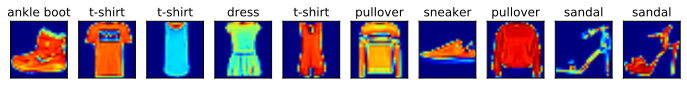

In [9]:
X, y = [], []
for i in range(10):
    X.append(mnist_train[i][0])   # 图像内容
    y.append(mnist_train[i][1])   # 标签
    
show_fashion_mnist(X, get_fashion_mnist_labels(y))

In [10]:
### 小批量读取

batch_size = 256

if sys.platform.startswith("win"):
    num_workers = 0  # 
else:
    num_workers = 4 # 表示如果在其他平台，则使用4个进程来读取数据

# 以迭代的方式进行数据读取

train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_iter  = torch.utils.data.DataLoader(mnist_test , batch_size=batch_size, shuffle=True, num_workers=num_workers)


In [11]:
# 查看读取所有train数据的时间

start = time.time()
for X, y in train_iter:
    continue
print('%.2f second.' % (time.time() - start))

1.65 second.
